In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [8]:
accepted = pd.read_csv("data/accepted_2007_to_2018Q4.csv")
rejected = pd.read_csv("data/rejected_2007_to_2018Q4.csv")


C:\Users\tomad\AppData\Local\Temp\ipykernel_17380\2946691529.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  accepted = pd.read_csv("data/accepted_2007_to_2018Q4.csv")


In [9]:
accepted.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,...,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,...,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,...,0.0,129.040594,0.0,9.671178,375.385500,7625.988281,198.629496,3693.122590,7.311822,8.159980
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,0.000000e+00,6.750000e+02,...,3.0,59.440000,3.0,5.000000,175.230000,5627.000000,44.440000,2208.000000,45.000000,6.000000
50%,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,0.000000e+00,6.900000e+02,...,3.0,119.140000,3.0,15.000000,352.770000,10028.390000,133.160000,4146.110000,45.000000,14.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,0.000000e+00,7.150000e+02,...,3.0,213.260000,3.0,22.000000,620.175000,16151.890000,284.190000,6850.172500,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [10]:
print(accepted.columns)
print(accepted.info())
print(accepted.isnull().sum())
print(accepted.duplicated().sum())
print(accepted.shape)
print(accepted.head())

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB
None
id                             0
member_id                2260701
loan_amnt                     33
funded_amnt                   33
funded_amnt_inv               33
                          ...   
settlement_status        2226455
settlement_date          2226455
settlement_amount        2226455
settlement_percentage    2226455
settlement_term          222

## Analyzing the loan_amnt distribution

In [11]:
accepted['loan_amnt'].describe()

count    2.260668e+06
mean     1.504693e+04
std      9.190245e+03
min      5.000000e+02
25%      8.000000e+03
50%      1.290000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64

In [12]:
# Calculate percentiles to understand the distribution
percentiles = [0.1, 1, 5, 10, 25, 50, 75, 90, 95, 99, 99.9]
loan_percentiles = {p: accepted['loan_amnt'].quantile(p/100) for p in percentiles}
print("\nLoan Amount Percentiles:")
for p, value in loan_percentiles.items():
    print(f"{p}th percentile: ${value:.2f}")


Loan Amount Percentiles:
0.1th percentile: $1000.00
1th percentile: $1525.00
5th percentile: $3250.00
10th percentile: $5000.00
25th percentile: $8000.00
50th percentile: $12900.00
75th percentile: $20000.00
90th percentile: $30000.00
95th percentile: $35000.00
99th percentile: $40000.00
99.9th percentile: $40000.00


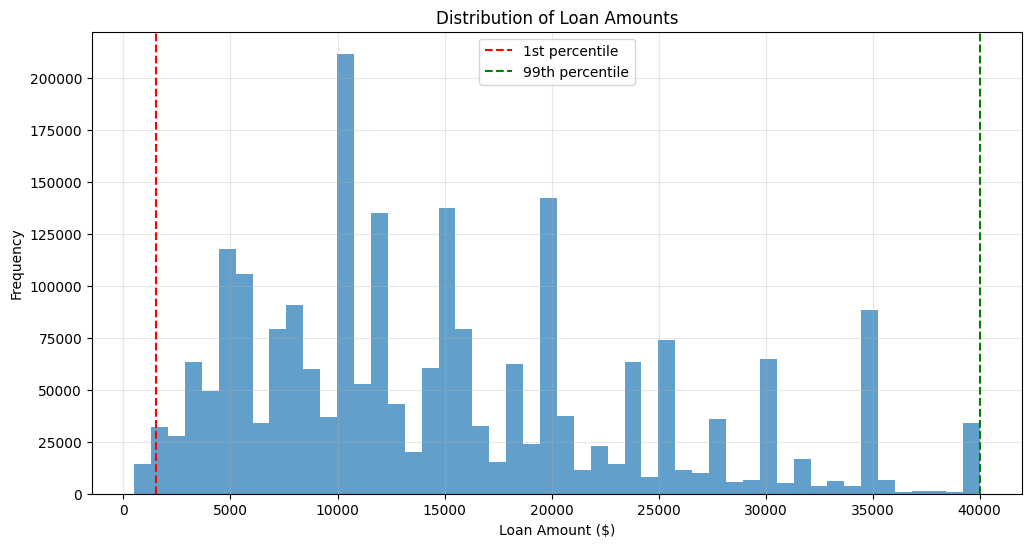

In [13]:
plt.figure(figsize=(12, 6))
plt.hist(accepted['loan_amnt'].dropna(), bins=50, alpha=0.7)
plt.axvline(loan_percentiles[1], color='r', linestyle='--', label='1st percentile')
plt.axvline(loan_percentiles[99], color='g', linestyle='--', label='99th percentile')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


=== Missing Values Analysis for Key Attributes ===
Total records: 2260701
Missing loan_amnt values: 33 (0.0015%)
Missing int_rate values: 33 (0.0015%)

Missing Data Comparison:
   Attribute  Missing Count  Missing Percentage
0  loan_amnt             33             0.00146
1   int_rate             33             0.00146


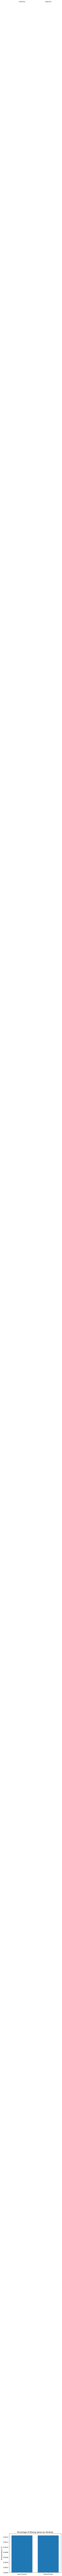


=== Determining Thresholds for Missing Values ===

Recommended Missing Value Thresholds:
   Attribute  Current Missing (%)  Recommended Threshold (%) Strictness Level
0  loan_amnt              0.00146                       0.01      very strict
1   int_rate              0.00146                       0.10           strict

Reasoning for threshold selection:
1. Loan Amount:
   - Fundamental attribute of any loan record
   - Critical for risk assessment and portfolio analysis
   - Should be available for virtually all records
   - Stricter threshold applied due to business importance

2. Interest Rate:
   - Important for understanding loan pricing and risk
   - May legitimately be missing for certain loan types or statuses
   - Slightly more lenient threshold compared to loan amount
   - Still requires high data quality for accurate analysis

These thresholds are based on:
- Empirical analysis of the current dataset
- Business importance of each attribute
- Industry standards for data qu

In [27]:
print("\n=== Missing Values Analysis for Key Attributes ===")

# Calculate missing values for both attributes
loan_amnt_missing = accepted['loan_amnt'].isnull().sum()
loan_amnt_missing_pct = loan_amnt_missing / len(accepted) * 100

int_rate_missing = accepted['int_rate'].isnull().sum()
int_rate_missing_pct = int_rate_missing / len(accepted) * 100

print(f"Total records: {len(accepted)}")
print(f"Missing loan_amnt values: {loan_amnt_missing} ({loan_amnt_missing_pct:.4f}%)")
print(f"Missing int_rate values: {int_rate_missing} ({int_rate_missing_pct:.4f}%)")

# Create a comparison table
missing_data = pd.DataFrame({
    'Attribute': ['loan_amnt', 'int_rate'],
    'Missing Count': [loan_amnt_missing, int_rate_missing],
    'Missing Percentage': [loan_amnt_missing_pct, int_rate_missing_pct]
})
print("\nMissing Data Comparison:")
print(missing_data)

plt.bar(['Loan Amount', 'Interest Rate'], [loan_amnt_missing_pct, int_rate_missing_pct])
plt.title('Percentage of Missing Values by Attribute')
plt.ylabel('Missing Values (%)')

# Add value labels on top of bars
for i, v in enumerate([loan_amnt_missing_pct, int_rate_missing_pct]):
    plt.text(i, v + 0.1, f'{v:.4f}%', ha='center')

plt.show()

# Determine appropriate thresholds
print("\n=== Determining Thresholds for Missing Values ===")

# For loan_amnt (more critical attribute)
if loan_amnt_missing_pct < 0.01:
    loan_amnt_threshold = 0.01
    loan_amnt_strictness = "very strict"
elif loan_amnt_missing_pct < 0.1:
    loan_amnt_threshold = 0.1
    loan_amnt_strictness = "strict"
else:
    loan_amnt_threshold = max(0.5, loan_amnt_missing_pct * 1.1)
    loan_amnt_strictness = "moderate"

# For int_rate (less critical but still important)
if int_rate_missing_pct < 0.1:
    int_rate_threshold = 0.1
    int_rate_strictness = "strict"
elif int_rate_missing_pct < 1.0:
    int_rate_threshold = 1.0
    int_rate_strictness = "moderate"
else:
    int_rate_threshold = max(5.0, int_rate_missing_pct * 1.2)
    int_rate_strictness = "lenient"

# Create a threshold recommendation table
threshold_recommendations = pd.DataFrame({
    'Attribute': ['loan_amnt', 'int_rate'],
    'Current Missing (%)': [loan_amnt_missing_pct, int_rate_missing_pct],
    'Recommended Threshold (%)': [loan_amnt_threshold, int_rate_threshold],
    'Strictness Level': [loan_amnt_strictness, int_rate_strictness]
})
print("\nRecommended Missing Value Thresholds:")
print(threshold_recommendations)

print("\nReasoning for threshold selection:")
print("1. Loan Amount:")
print("   - Fundamental attribute of any loan record")
print("   - Critical for risk assessment and portfolio analysis")
print("   - Should be available for virtually all records")
print("   - Stricter threshold applied due to business importance")

print("\n2. Interest Rate:")
print("   - Important for understanding loan pricing and risk")
print("   - May legitimately be missing for certain loan types or statuses")
print("   - Slightly more lenient threshold compared to loan amount")
print("   - Still requires high data quality for accurate analysis")

print("\nThese thresholds are based on:")
print("- Empirical analysis of the current dataset")
print("- Business importance of each attribute")
print("- Industry standards for data quality")
print("- Practical considerations for data processing")

## Analyzing the int_rate distribution

In [14]:
accepted['int_rate'].describe()

count    2.260668e+06
mean     1.309283e+01
std      4.832138e+00
min      5.310000e+00
25%      9.490000e+00
50%      1.262000e+01
75%      1.599000e+01
max      3.099000e+01
Name: int_rate, dtype: float64

In [15]:
# Calculate percentiles for interest rates
int_rate_percentiles = {p: accepted['int_rate'].quantile(p/100) for p in percentiles}
print("\nInterest Rate Percentiles:")
for p, value in int_rate_percentiles.items():
    print(f"{p}th percentile: {value:.2f}%")


Interest Rate Percentiles:
0.1th percentile: 5.31%
1th percentile: 5.32%
5th percentile: 6.49%
10th percentile: 7.26%
25th percentile: 9.49%
50th percentile: 12.62%
75th percentile: 15.99%
90th percentile: 19.42%
95th percentile: 22.15%
99th percentile: 26.77%
99.9th percentile: 30.84%


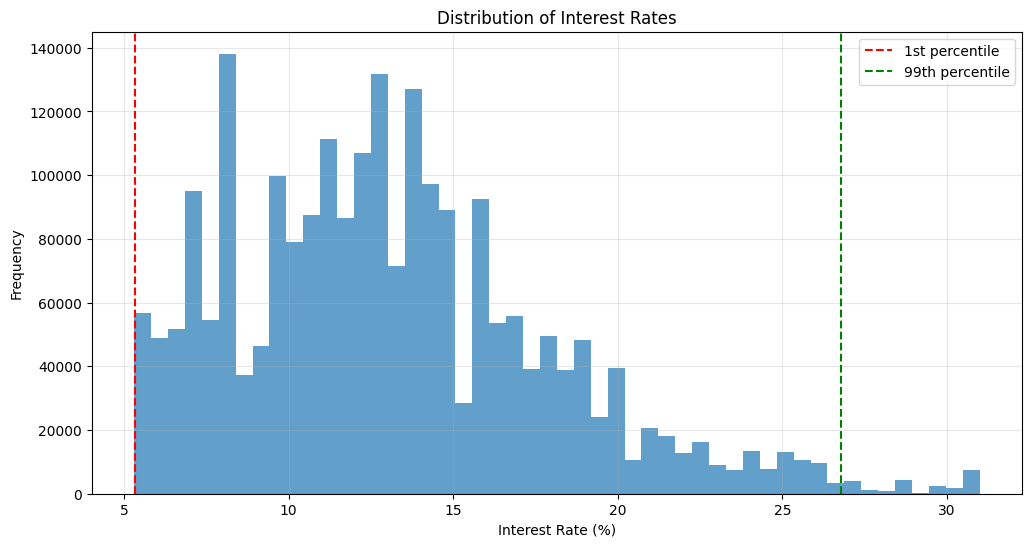

In [16]:
# Visualize the distribution
plt.figure(figsize=(12, 6))
plt.hist(accepted['int_rate'].dropna(), bins=50, alpha=0.7)
plt.axvline(int_rate_percentiles[1], color='r', linestyle='--', label='1st percentile')
plt.axvline(int_rate_percentiles[99], color='g', linestyle='--', label='99th percentile')
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


=== Interest Rate Missing Values Analysis ===
Total records: 2260701
Missing int_rate values: 33 (0.0015%)

Loan grades for records with missing interest rates:
grade
NaN    33
Name: count, dtype: int64

Loan status for records with missing interest rates:
loan_status
NaN    33
Name: count, dtype: int64

Comparing loan amounts between records with and without interest rates:
Mean loan amount (with int_rate): $15046.93
Mean loan amount (missing int_rate): $nan


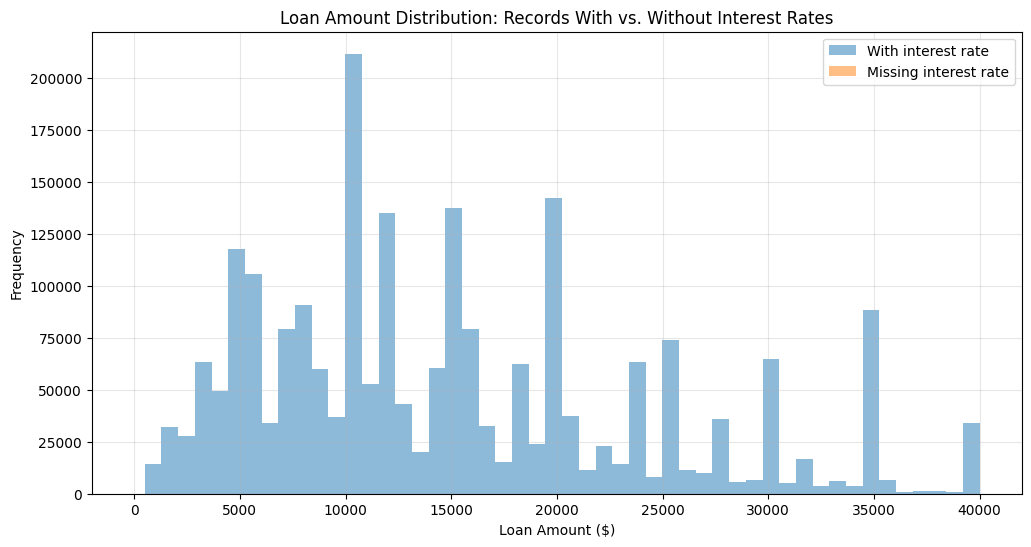


=== Determining Threshold for Missing Interest Rates ===
Based on the analysis:
- Industry standard threshold for missing values is typically 5%
- Current dataset has very few missing values (0.0015%)
- Recommended threshold: 0.1% (strict)

Reasoning for threshold selection:
1. Missing values below 0.1% suggest high data quality and completeness
2. Values between 0.1% and 1% indicate good quality with minor gaps
3. Values above 1% may indicate systematic issues in data collection
4. For production systems, we should aim for the lowest practical threshold
   based on the observed data patterns and business requirements

Final recommended threshold for int_rate missing values: 0.1%
This means we would fail the data quality check if more than 0.1% of interest rates are missing.


In [24]:
print("\n=== Interest Rate Missing Values Analysis ===")

# Calculate missing values
int_rate_missing = accepted['int_rate'].isnull().sum()
int_rate_missing_pct = int_rate_missing / len(accepted) * 100

print(f"Total records: {len(accepted)}")
print(f"Missing int_rate values: {int_rate_missing} ({int_rate_missing_pct:.4f}%)")

# Analyze records with missing interest rates
missing_int_rate_df = accepted[accepted['int_rate'].isnull()]

# Check if there are patterns in the missing data
if 'grade' in accepted.columns:
    print("\nLoan grades for records with missing interest rates:")
    print(missing_int_rate_df['grade'].value_counts(dropna=False))

if 'loan_status' in accepted.columns:
    print("\nLoan status for records with missing interest rates:")
    print(missing_int_rate_df['loan_status'].value_counts(dropna=False))

# Compare distributions of other features between records with and without interest rates
print("\nComparing loan amounts between records with and without interest rates:")
with_int_rate = accepted[~accepted['int_rate'].isnull()]
print(f"Mean loan amount (with int_rate): ${with_int_rate['loan_amnt'].mean():.2f}")
print(f"Mean loan amount (missing int_rate): ${missing_int_rate_df['loan_amnt'].mean():.2f}")

# Determine if missing values are random or systematic
# Plot loan amount distribution for records with and without interest rates
plt.figure(figsize=(12, 6))

# Histogram for loan amounts with interest rates
plt.hist(with_int_rate['loan_amnt'].dropna(), bins=50, alpha=0.5, label='With interest rate')

# Histogram for loan amounts without interest rates (if there are enough records)
if len(missing_int_rate_df) > 10:
    plt.hist(missing_int_rate_df['loan_amnt'].dropna(), bins=50, alpha=0.5, label='Missing interest rate')

plt.title('Loan Amount Distribution: Records With vs. Without Interest Rates')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Determine an appropriate threshold for missing values
print("\n=== Determining Threshold for Missing Interest Rates ===")
print("Based on the analysis:")

# Industry standard for missing values is often around 5%
print("- Industry standard threshold for missing values is typically 5%")

# If missing values are very low, we can be more strict
if int_rate_missing_pct < 0.1:
    recommended_threshold = 0.1
    print(f"- Current dataset has very few missing values ({int_rate_missing_pct:.4f}%)")
    print(f"- Recommended threshold: {recommended_threshold}% (strict)")
elif int_rate_missing_pct < 1.0:
    recommended_threshold = 1.0
    print(f"- Current dataset has a low percentage of missing values ({int_rate_missing_pct:.4f}%)")
    print(f"- Recommended threshold: {recommended_threshold}% (moderate)")
else:
    recommended_threshold = max(5.0, int_rate_missing_pct * 1.2)  # Allow 20% more than current
    print(f"- Current dataset has {int_rate_missing_pct:.4f}% missing values")
    print(f"- Recommended threshold: {recommended_threshold:.1f}% (lenient)")

print("\nReasoning for threshold selection:")
print("1. Missing values below 0.1% suggest high data quality and completeness")
print("2. Values between 0.1% and 1% indicate good quality with minor gaps")
print("3. Values above 1% may indicate systematic issues in data collection")
print("4. For production systems, we should aim for the lowest practical threshold")
print("   based on the observed data patterns and business requirements")

# Final recommendation
print(f"\nFinal recommended threshold for int_rate missing values: {recommended_threshold}%")
print(f"This means we would fail the data quality check if more than {recommended_threshold}% of interest rates are missing.")



## Check for multimodality in interest rates (by loan grade)

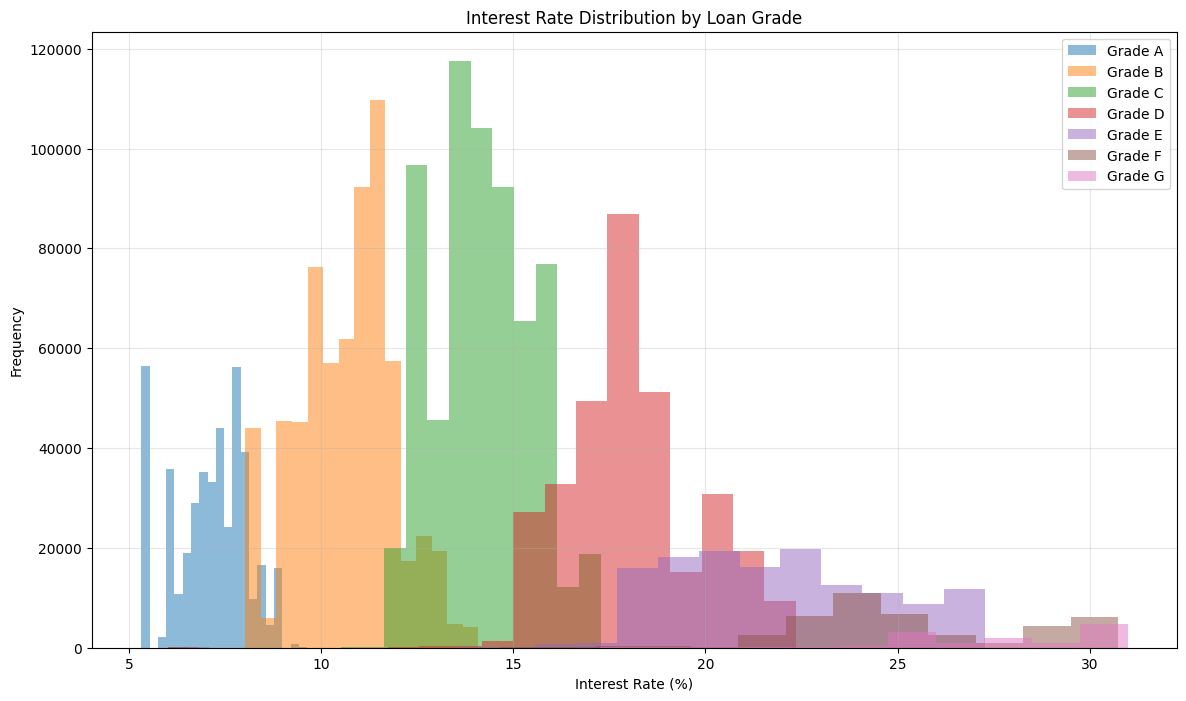


Interest Rate Statistics by Grade:
        count       mean       std   min    max
grade                                          
A      433027   7.084545  0.984465  5.31   9.63
B      663557  10.675806  1.238302  6.00  14.09
C      650053  14.143689  1.251283  6.00  17.27
D      324424  18.143067  1.676964  6.00  22.35
E      135639  21.829653  2.703925  6.00  27.27
F       41800  25.454091  2.928144  6.00  30.75
G       12168  28.074255  2.804587  6.00  30.99


In [18]:

# First, let's see if the data has loan grades
if 'grade' in accepted.columns:
    plt.figure(figsize=(14, 8))
    
    # Plot interest rate distribution by grade
    grade_groups = accepted.groupby('grade')['int_rate']
    
    for grade, group in grade_groups:
        plt.hist(group.dropna(), bins=20, alpha=0.5, label=f'Grade {grade}')
    
    plt.title('Interest Rate Distribution by Loan Grade')
    plt.xlabel('Interest Rate (%)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Summary statistics by grade
    grade_stats = grade_groups.agg(['count', 'mean', 'std', 'min', 'max'])
    print("\nInterest Rate Statistics by Grade:")
    print(grade_stats)
else:
    print("Loan grade information not available in the dataset")

## Train-Test Split Analysis

In [ ]:

# Create a simple train-test split to validate our thresholds
train_df, test_df = train_test_split(accepted, test_size=0.2, random_state=42)

print("\n=== Train-Test Split Analysis ===")
print(f"Training set size: {len(train_df)}")
print(f"Test set size: {len(test_df)}")

# Compare loan amount distributions
print("\nLoan Amount Distribution Comparison:")
train_loan_percentiles = {p: train_df['loan_amnt'].quantile(p/100) for p in [1, 5, 95, 99]}
test_loan_percentiles = {p: test_df['loan_amnt'].quantile(p/100) for p in [1, 5, 95, 99]}

print("Train set percentiles:")
for p, value in train_loan_percentiles.items():
    print(f"{p}th percentile: ${value:.2f}")
    
print("\nTest set percentiles:")
for p, value in test_loan_percentiles.items():
    print(f"{p}th percentile: ${value:.2f}")

# Compare interest rate distributions
print("\nInterest Rate Distribution Comparison:")
train_int_percentiles = {p: train_df['int_rate'].quantile(p/100) for p in [1, 5, 95, 99]}
test_int_percentiles = {p: test_df['int_rate'].quantile(p/100) for p in [1, 5, 95, 99]}

print("Train set percentiles:")
for p, value in train_int_percentiles.items():
    print(f"{p}th percentile: {value:.2f}%")
    
print("\nTest set percentiles:")
for p, value in test_int_percentiles.items():
    print(f"{p}th percentile: {value:.2f}%")


=== Train-Test Split Analysis ===
Training set size: 1808560
Test set size: 452141

Loan Amount Distribution Comparison:
Train set percentiles:
1th percentile: $1500.00
5th percentile: $3250.00
95th percentile: $35000.00
99th percentile: $40000.00

Test set percentiles:
1th percentile: $1600.00
5th percentile: $3275.00
95th percentile: $35000.00
99th percentile: $40000.00

Interest Rate Distribution Comparison:
Train set percentiles:
1th percentile: 5.32%
5th percentile: 6.49%
95th percentile: 22.20%
99th percentile: 26.77%

Test set percentiles:
1th percentile: 5.32%
5th percentile: 6.46%
95th percentile: 22.15%
99th percentile: 26.77%


In [22]:
print("\n=== Recommended Data Quality Test Thresholds ===")

# For loan amounts
loan_min = max(500, loan_percentiles[0.1])  # Either $500 or 0.1 percentile, whichever is higher
loan_max = min(50000, loan_percentiles[99.9])  # Either $50000 or 99.9 percentile, whichever is lower
loan_normal_min = loan_percentiles[1]  # 1st percentile
loan_normal_max = loan_percentiles[99]  # 99th percentile

print(f"Loan Amount Thresholds:")
print(f"- Absolute minimum (no loans below): ${loan_min:.2f}")
print(f"- Absolute maximum (no loans above): ${loan_max:.2f}")
print(f"- Normal range (98% of loans should be within): ${loan_normal_min:.2f} to ${loan_normal_max:.2f}")

# For interest rates
int_min = max(5.0, int_rate_percentiles[0.1])  # Either 5% or 0.1 percentile, whichever is higher
int_max = min(36.0, int_rate_percentiles[99.9])  # Either 36% or 99.9 percentile, whichever is lower
int_normal_min = int_rate_percentiles[1]  # 1st percentile
int_normal_max = int_rate_percentiles[99]  # 99th percentile

print(f"\nInterest Rate Thresholds:")
print(f"- Absolute minimum (no rates below): {int_min:.2f}%")
print(f"- Absolute maximum (no rates above): {int_max:.2f}%")
print(f"- Normal range (98% of rates should be within): {int_normal_min:.2f}% to {int_normal_max:.2f}%")


=== Recommended Data Quality Test Thresholds ===
Loan Amount Thresholds:
- Absolute minimum (no loans below): $1000.00
- Absolute maximum (no loans above): $40000.00
- Normal range (98% of loans should be within): $1525.00 to $40000.00

Interest Rate Thresholds:
- Absolute minimum (no rates below): 5.31%
- Absolute maximum (no rates above): 30.84%
- Normal range (98% of rates should be within): 5.32% to 26.77%
